<a href="https://colab.research.google.com/github/RoxPiceno/Estadistica-Multivariada/blob/main/Piceno%26P%C3%A9rez_T3_E2_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CARGAR LIBRERÍAS
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CARGAR DATOS
# Datos de la Tabla 5: Altura, Peso e IMC
data = {
    'Altura': [1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95],
    'Peso': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'IMC': [22.2, 22.9, 23.4, 23.9, 24.2, 24.5, 24.7, 24.9, 25.0, 25.2]
}

df = pd.DataFrame(data)
print("=" * 60)
print("DATOS ORIGINALES (Tabla 5)")
print("=" * 60)
print(df)
print("\n" + "=" * 60)

DATOS ORIGINALES (Tabla 5)
   Altura  Peso   IMC
0    1.50    50  22.2
1    1.55    55  22.9
2    1.60    60  23.4
3    1.65    65  23.9
4    1.70    70  24.2
5    1.75    75  24.5
6    1.80    80  24.7
7    1.85    85  24.9
8    1.90    90  25.0
9    1.95    95  25.2



In [ ]:
# PREPARAR VARIABLES
# Variables independientes (X) y dependiente (y)
X = df[['Altura', 'Peso']]
y = df['IMC']

# Añadir constante (intercepto) para statsmodels
X_const = sm.add_constant(X)

In [ ]:
# AJUSTAR MODELO DE REGRESIÓN
# Modelo con statsmodels (para análisis detallado)
model_sm = sm.OLS(y, X_const).fit()

# Modelo con scikit-learn (opcional, para predicciones)
model_sk = LinearRegression()
model_sk.fit(X, y)

print("\nMODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 60)
print("Ecuación: IMC = b0 + b1*Altura + b2*Peso")
print("\nCOEFICIENTES DEL MODELO:")
print(f"Intercepto (b0): {model_sm.params['const']:.4f}")
print(f"Altura (b1): {model_sm.params['Altura']:.4f}")
print(f"Peso (b2): {model_sm.params['Peso']:.4f}")
print("\n" + "=" * 60)


MODELO DE REGRESIÓN LINEAL MÚLTIPLE
Ecuación: IMC = b0 + b1*Altura + b2*Peso

COEFICIENTES DEL MODELO:
Intercepto (b0): 9.7647
Altura (b1): 9.7644
Peso (b2): -0.0347



In [ ]:
# RESUMEN ESTADÍSTICO DEL MODELO
print("\nRESUMEN ESTADÍSTICO (statsmodels)")
print("=" * 60)
print(model_sm.summary())
print("=" * 60)


RESUMEN ESTADÍSTICO (statsmodels)
                            OLS Regression Results                            
Dep. Variable:                    IMC   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           6.44e-06
Time:                        06:27:46   Log-Likelihood:               -0.17658
No. Observations:                  10   AIC:                             4.353
Df Residuals:                       8   BIC:                             4.958
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.

a) ¿Cuál será el IMC estimado de una persona con una altura de 1.82
m y un peso de 85 kg?

In [ ]:
# a) IMC estimado para altura=1.82 m y peso=85 kg
pred_a = model_sm.predict([1, 1.82, 85])
print(f"\na) IMC estimado (1.82m, 85kg): {pred_a[0]:.2f}")


a) IMC estimado (1.82m, 85kg): 24.58


b) Si una persona pierde 5 kg sin cambiar su altura, ¿cómo afecta esto
su IMC según el modelo?

In [ ]:
# b) Efecto de perder 5 kg sin cambiar altura
coef_peso = model_sm.params['Peso']
cambio_imc = coef_peso * (-5)
print(f"b) Cambio en IMC al perder 5 kg: {cambio_imc:.3f} puntos")
print(f"   (Coeficiente del peso: {coef_peso:.4f} por kg)")

b) Cambio en IMC al perder 5 kg: 0.174 puntos
   (Coeficiente del peso: -0.0347 por kg)


c) ¿Cuál es el peso necesario para que una persona de 1.75 m tenga un
IMC de 22?

In [ ]:
# c) Peso necesario para IMC=22 con altura=1.75 m
b0 = model_sm.params['const']
b1 = model_sm.params['Altura']
b2 = model_sm.params['Peso']
imc_deseado = 22
altura_dada = 1.75
peso_necesario = (imc_deseado - b0 - b1 * altura_dada) / b2
print(f"c) Peso necesario para IMC=22 (altura 1.75m): {peso_necesario:.2f} kg")

c) Peso necesario para IMC=22 (altura 1.75m): 139.70 kg


d) ¿Cuál de las dos variables, altura o peso, tiene mayor impacto en la
predicción del IMC?

In [ ]:
# d) Variable con mayor impacto (comparación de coeficientes estandarizados)
# Estandarizar coeficientes para comparación justa
X_std = X.std()
coef_std_altura = abs(model_sm.params['Altura'] * X_std['Altura'])
coef_std_peso = abs(model_sm.params['Peso'] * X_std['Peso'])

print(f"\nd) IMPACTO RELATIVO DE LAS VARIABLES:")
print(f"   Coeficiente estandarizado Altura: {coef_std_altura:.4f}")
print(f"   Coeficiente estandarizado Peso: {coef_std_peso:.4f}")

if coef_std_peso > coef_std_altura:
    print("   → El PESO tiene mayor impacto en la predicción del IMC")
else:
    print("   → La ALTURA tiene mayor impacto en la predicción del IMC")


d) IMPACTO RELATIVO DE LAS VARIABLES:
   Coeficiente estandarizado Altura: 1.4782
   Coeficiente estandarizado Peso: 0.5258
   → La ALTURA tiene mayor impacto en la predicción del IMC


e) Si se añaden más datos al modelo, ¿cómo podemos evaluar si mejora
la precisión de las predicciones?

In [ ]:
# e) Evaluación de mejora con más datos
print(f"\ne) EVALUACIÓN DE MEJORA CON MÁS DATOS:")
print(f"   R-cuadrado actual: {model_sm.rsquared:.4f}")
print(f"   R-cuadrado ajustado: {model_sm.rsquared_adj:.4f}")
print(f"   Error estándar de los residuos: {np.sqrt(model_sm.mse_resid):.4f}")
print("\n   Métodos para evaluar mejora al añadir datos:")
print("   1. Validación cruzada (cross-validation)")
print("   2. Comparación de R² ajustado en conjuntos de prueba")
print("   3. Análisis de residuales (deben ser aleatorios)")
print("   4. Pruebas de sobreajuste (overfitting)")


e) EVALUACIÓN DE MEJORA CON MÁS DATOS:
   R-cuadrado actual: 0.9308
   R-cuadrado ajustado: 0.9222
   Error estándar de los residuos: 0.2754

   Métodos para evaluar mejora al añadir datos:
   1. Validación cruzada (cross-validation)
   2. Comparación de R² ajustado en conjuntos de prueba
   3. Análisis de residuales (deben ser aleatorios)
   4. Pruebas de sobreajuste (overfitting)


In [ ]:
# PREDICCIÓN ADICIONAL (ejemplo del PDF)
# --------------------------
pred_ejemplo = model_sm.predict([1, 1.78, 77])
print(f"\n" + "=" * 60)
print(f"PREDICCIÓN ADICIONAL (ejemplo del PDF):")
print(f"IMC para altura=1.78m y peso=77kg: {pred_ejemplo[0]:.2f}")
print("=" * 60)


PREDICCIÓN ADICIONAL (ejemplo del PDF):
IMC para altura=1.78m y peso=77kg: 24.47


VISUALIZACIÓN

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


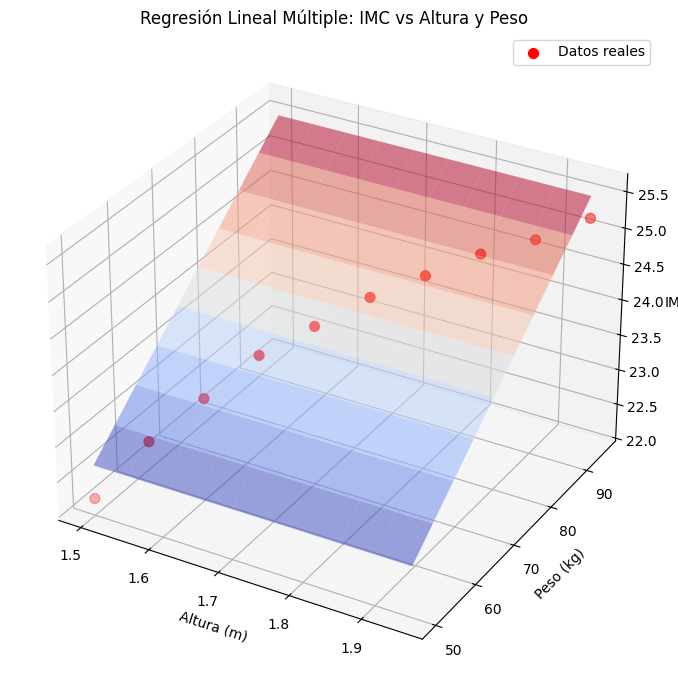

In [ ]:
# Gráfico 3D de la superficie de regresión
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(df['Altura'], df['Peso'], df['IMC'], c='red', marker='o', s=50, label='Datos reales')

# Superficie de predicción
altura_range = np.linspace(df['Altura'].min(), df['Altura'].max(), 10)
peso_range = np.linspace(df['Peso'].min(), df['Peso'].max(), 10)
Altura_grid, Peso_grid = np.meshgrid(altura_range, peso_range)
IMC_pred_grid = model_sk.predict(np.array([Altura_grid.flatten(), Peso_grid.flatten()]).T)
IMC_pred_grid = IMC_pred_grid.reshape(Altura_grid.shape)

ax.plot_surface(Altura_grid, Peso_grid, IMC_pred_grid, alpha=0.5, cmap='coolwarm')

ax.set_xlabel('Altura (m)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('IMC')
ax.set_title('Regresión Lineal Múltiple: IMC vs Altura y Peso')
plt.legend()
plt.tight_layout()
plt.show()


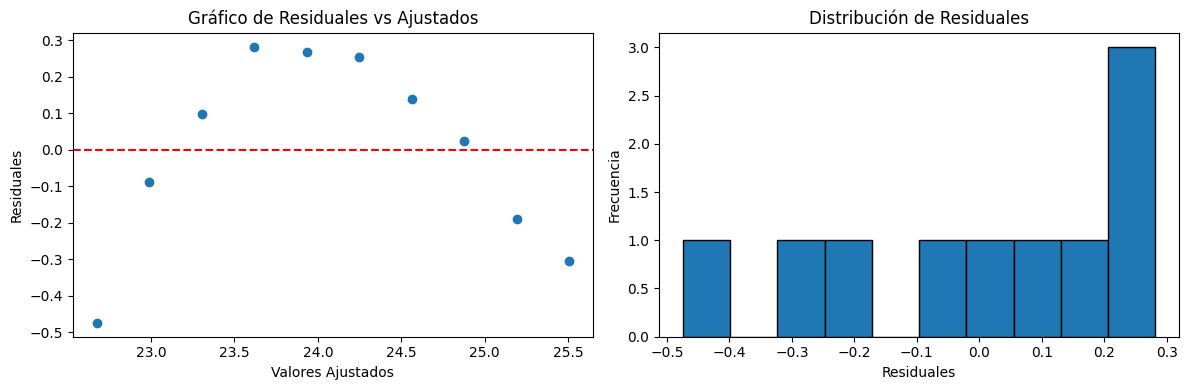

In [ ]:
# Gráfico de residuales
residuales = model_sm.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(model_sm.fittedvalues, residuales)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Valores Ajustados')
axes[0].set_ylabel('Residuales')
axes[0].set_title('Gráfico de Residuales vs Ajustados')

axes[1].hist(residuales, bins=10, edgecolor='black')
axes[1].set_xlabel('Residuales')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Residuales')

plt.tight_layout()
plt.show()